# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [9]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

In [2]:
tips = load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [6]:
y, X = patsy.dmatrices('tip ~ smoker + net_bill', tips[:5])
X

DesignMatrix with shape (5, 3)
  Intercept  smoker[T.No]  net_bill
          1             1     15.98
          1             1      8.68
          1             1     17.51
          1             1     20.37
          1             1     20.98
  Terms:
    'Intercept' (column 0)
    'smoker' (column 1)
    'net_bill' (column 2)

In [21]:
reg = smf.ols('tip ~ net_bill', data = tips).fit()
tips['res_log'] = reg.resid

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Tue, 25 Apr 2023   Prob (F-statistic):           5.02e-23
Time:                        20:07:51   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

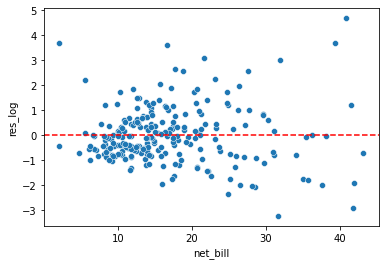

In [10]:
sns.scatterplot(x = 'net_bill', y = 'res_log', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

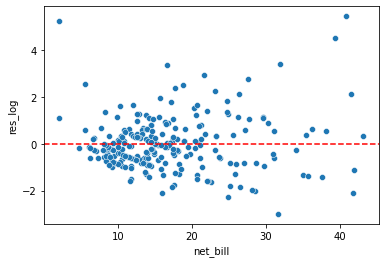

In [24]:
reg = smf.ols('tip ~ np.log(net_bill)', data = tips).fit()
tips['res_log'] = reg.resid

reg.summary()

sns.scatterplot(x = 'net_bill', y = 'res_log', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

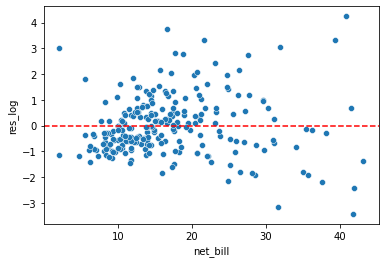

In [15]:
reg = smf.ols('tip ~ smoker  + np.power(net_bill, 2)', data = tips).fit()
tips['res_log'] = reg.resid

reg.summary()

sns.scatterplot(x = 'net_bill', y = 'res_log', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

O melhor modelo é que utiliza np.log(net_bill) por ter um r_squared maior. Ambos os gráficos de resíduos são bem parecidos.

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [20]:
tips['pred'] = reg.fittedvalues

r = tips[['pred', 'tip']].corr().iloc[0,1]

print(r**2)



0.33254073123237066


Os coeficientes são bem próximos, mas o modelo do item II apresenta um melhor coeficiente de determinação.

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [26]:
df = pd.read_csv('previsao_de_renda.csv')

In [50]:
y, X = patsy.dmatrices('renda ~ tempo_emprego + sexo + posse_de_veiculo', df)
X

DesignMatrix with shape (12466, 4)
  Intercept  sexo[T.M]  posse_de_veiculo[T.True]  tempo_emprego
          1          0                         0        3.57534
          1          1                         1        0.86027
          1          1                         1        8.06575
          1          0                         1        1.20822
          1          1                         0       13.87397
          1          1                         0       15.56164
          1          0                         0        5.04658
          1          1                         1        1.59178
          1          0                         0        3.43014
          1          0                         0        7.21918
          1          0                         0        5.63836
          1          0                         1        4.47945
          1          0                         0       16.52877
          1          0                         0        7.93425
     

In [54]:
reg = smf.ols('renda ~ tempo_emprego + sexo + posse_de_imovel + educacao', data = df).fit()
df['res_log'] = reg.resid

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     470.9
Date:                Tue, 25 Apr 2023   Prob (F-statistic):               0.00
Time:                        20:18:47   Log-Likelihood:            -1.2208e+05
No. Observations:               12466   AIC:                         2.442e+05
Df Residuals:                   12458   BIC:                         2.442e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                        1137.5882    442.852      2.569      0.010     269.529    2005.647
sexo[T.M]                        2273.5603     81.902     27.759      0.000    2113.019    2434.102
posse_de_imovel[T.True]           446.6920     81.686      5.468      0.000     286.575     606.809
educacao[T.Pós graduação]        2681.7711   1086.277      2.469      0.014     552.500    4811.043
educacao[T.Secundário]              4.9253    439.125      0.011      0.991    -855.828     865.678
educacao[T.Superior completo]     600.5268    440.749      1.363      0.173    -263.410    1464.463
educacao[T.Superior incompleto]  -160.4680    472.421     -0.340      0.734   -1086.486     765.551
tempo_emprego                     307.4698      5.797     53.043      0.000     296.108     318.832
==============================================================================
Omnibus:                    10141.878   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           442584.695
Skew:                           3.610   Prob(JB):                         0.00
Kurtosis:                      31.283   Cond. No.                         316.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

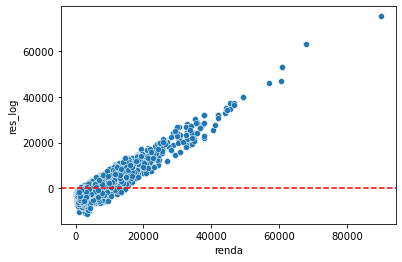

In [55]:
sns.scatterplot(x = 'renda', y = 'res_log', data = df)
plt.axhline(y=0, color='r', linestyle='--')

É possível testar qual o melhor comportamento com log ou polinômio, para melhorar o resíduo e a regressão.


In [68]:
reg = smf.ols('renda ~ tempo_emprego + C(sexo) + posse_de_imovel + C(educacao)', data = df).fit()
df['res_log'] = reg.resid

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     1072.
Date:                Tue, 25 Apr 2023   Prob (F-statistic):               0.00
Time:                        20:21:56   Log-Likelihood:            -1.2211e+05
No. Observations:               12466   AIC:                         2.442e+05
Df Residuals:                   12462   BIC:                         2.443e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1355.9069     87.956     15.416      0.000    1183.499    1528.315
C(sexo)[T.M]             2254.5013     82.038     27.481      0.000    2093.694    2415.309
posse_de_imovel[T.True]   472.5994     81.727      5.783      0.000     312.401     632.797
tempo_emprego             306.6556      5.802     52.851      0.000     295.282     318.029
==============================================================================
Omnibus:                    10140.054   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           438529.924
Skew:                           3.613   Prob(JB):                         0.00
Kurtosis:                      31.144   Cond. No.                         30.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

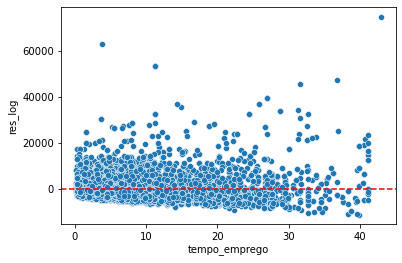

In [69]:
sns.scatterplot(x = 'tempo_emprego', y = 'res_log', data = df)
plt.axhline(y=0, color='r', linestyle='--')

O último modelo nos mostra algo mais linear, mas o modelo não é explicativo estar explicando apenas 20% com as variáveis utilizadas. Comparado ao modelo 1, o gráfico de resíduos melhorou linearmente.